In [1]:
# import sys
# sys.path.append('../')
# from src import load_dataset

import codecs, re, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nltk
from nltk.corpus import stopwords


def load_dataset(
    path="../data/raw/corpus.tache1.learn.utf8",
):
    corpus = []
    classes = []
    f = codecs.open(path, "r", "utf-8")  # pour régler le codage
    while True:
        texte = f.readline()
        if (len(texte)) < 5:
            break
        label = re.sub(r"<\d*:\d*:(.)>.*", "\\1", texte)
        texte = re.sub(r"<\d*:\d*:.>(.*)", "\\1", texte)
        if label.count("M") > 0:
            classes.append(-1)
        else:
            classes.append(1)
        corpus.append(texte)
    return np.array(corpus), np.array(classes)


# Données reconnaissance du locuteur (Chirac/Mitterrand)


## Analyse préliminaire


In [2]:
alltxts, alllabs = load_dataset()

print(f"Nombre de phrases [classes] : {len(alltxts)} [{len(alllabs)}]")
print(f"[Classe : {alllabs[0]}]", alltxts[0].rstrip())
print(f"[Classe : {alllabs[-1]}]", alltxts[-1].rstrip())
print(f"[Classe : {alllabs[12]}]", alltxts[12].rstrip())

print(
    "Nombre de phrases prononcés par Chirac :",
    np.sum(np.array(alllabs) == 1),
    np.sum(np.array(alllabs) == 1) / len(alltxts) * 100,
    "%",
)
print(
    "Nombre de phrases prononcés par Mitterand :",
    np.sum(np.array(alllabs) == -1),
    np.sum(np.array(alllabs) == -1) / len(alltxts) * 100,
    "%",
)


Nombre de phrases [classes] : 57413 [57413]
[Classe : 1]  Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.
[Classe : 1]  Je compte sur vous.
[Classe : -1]  C'est vrai qu'il y a très souvent dans notre pays un refus de regarder droit devant soi, comme un souhait d'en rester là, une certaine peur du changement, c'est vrai.
Nombre de phrases prononcés par Chirac : 49890 86.89669587027329 %
Nombre de phrases prononcés par Mitterand : 7523 13.103304129726718 %


Très rapidement on s'aperçoit d'un problème d'équilibrage dans notre jeu de données : preque 9 phrases sur 10 ont été prononcés par Chirac.

_Note_ :

- 1 correspond à Chirac (C)
- -1 correspond à Mitterand (M)


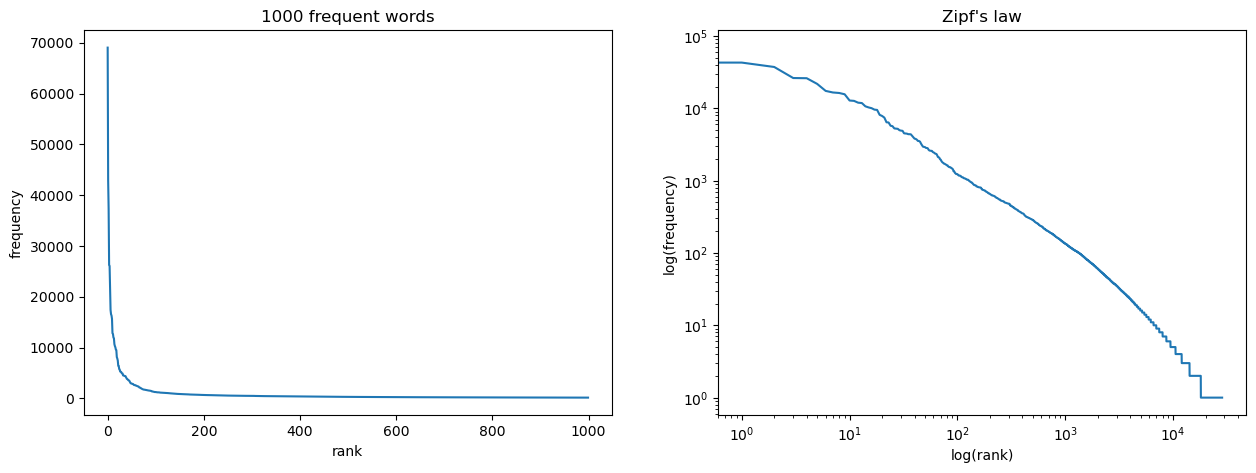

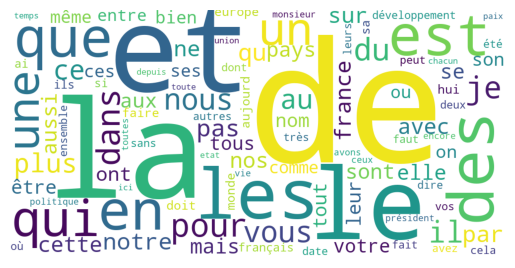

20 most frequent words
de      69031
la      42863
et      37281
le      26219
les     26067
des     21768
est     17401
en      16553
que     16292
qui     15635
un      12815
une     12669
pour    11964
dans    11820
du      10659
je      10286
il      10037
nous     9590
vous     9499
au       8122
dtype: int64
28524
1205104


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

## BoW (without stopwords)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(
    np.array(X.sum(axis=0))[0], index=sorted(vectorizer.vocabulary_)
)

## Zipf's law
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.savefig("../reports/figures/zipfs_nostopwords.png", dpi=100, bbox_inches="tight")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_nostopwords.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])
print(len(frequent_words))
print(sum(frequent_words))


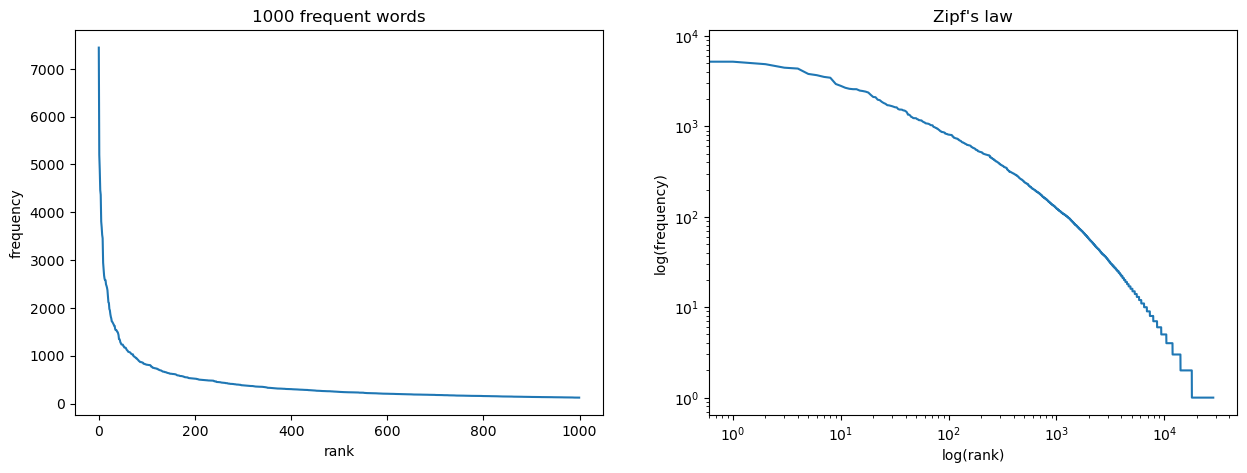

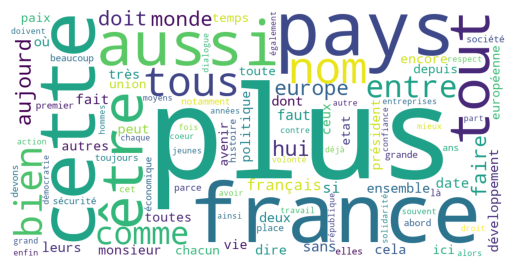

20 most frequent words
plus        7443
france      5201
cette       4883
pays        4464
aussi       4366
être        3808
tout        3688
nom         3530
tous        3457
bien        2945
comme       2811
entre       2678
europe      2609
hui         2582
aujourd     2581
monde       2492
doit        2463
faire       2426
français    2371
si          2231
dtype: int64
28400
673679


In [16]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("french"))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(
    np.array(X.sum(axis=0))[0], index=sorted(vectorizer.vocabulary_)
)

## Zipf's law
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.savefig("../reports/figures/zipfs_stopwords.png", dpi=100, bbox_inches="tight")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_stopwords.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])
print(len(frequent_words))
print(sum(frequent_words))


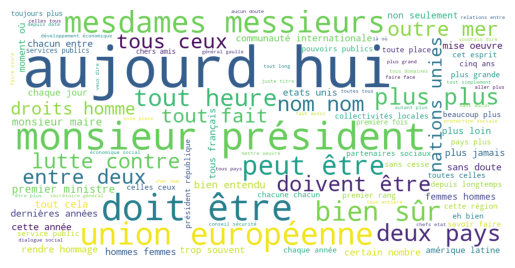

20 most frequent words
aujourd hui           2581
monsieur président     923
doit être              816
union européenne       664
mesdames messieurs     611
bien sûr               496
peut être              479
tout heure             393
deux pays              371
plus plus              357
doivent être           305
lutte contre           296
nom nom                294
tous ceux              282
outre mer              280
entre deux             278
tout fait              268
droits homme           247
premier ministre       246
nations unies          246
dtype: int64


In [10]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("french"), ngram_range=(2, 2))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(
    np.array(X.sum(axis=0))[0], index=sorted(vectorizer.vocabulary_)
)

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_stopwords_2grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])


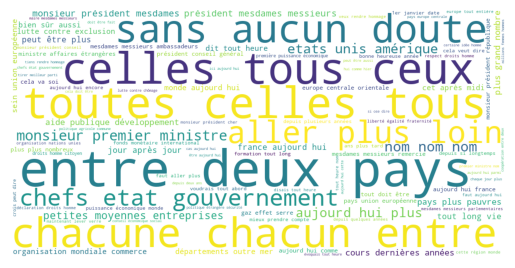

20 most frequent words
entre deux pays                 162
celles tous ceux                116
toutes celles tous              116
chacune chacun entre            104
sans aucun doute                 94
aller plus loin                  88
monsieur premier ministre        82
chefs etat gouvernement          82
nom nom nom                      76
etats unis amérique              71
aujourd hui plus                 67
petites moyennes entreprises     54
président mesdames messieurs     53
monsieur président mesdames      52
aide publique développement      49
pays plus pauvres                49
plus grand nombre                48
cours dernières années           46
peut être plus                   42
france aujourd hui               41
dtype: int64


In [11]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("french"), ngram_range=(3, 3))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(
    np.array(X.sum(axis=0))[0], index=sorted(vectorizer.vocabulary_)
)

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_stopwords_3grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])


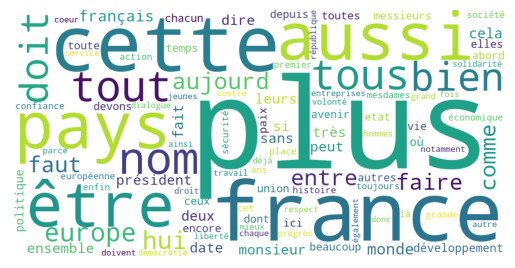

20 most frequent words
plus        975.030135
france      799.624287
cette       710.317518
aussi       680.211578
pays        658.609855
être        608.403085
nom         577.963093
tout        574.356586
tous        558.977501
bien        487.829793
doit        481.312942
europe      481.057837
hui         457.041346
aujourd     456.885867
entre       439.558730
faire       438.327584
faut        436.899677
comme       433.910723
français    426.357055
monde       424.000714
dtype: float64


In [7]:
## BoW (with stopwords, tf-idf)
vectorizer = TfidfVectorizer(stop_words=stopwords.words("french"))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(
    np.array(X.sum(axis=0))[0], index=sorted(vectorizer.vocabulary_)
)

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wordcloud.generate_from_frequencies(frequent_words)
wordcloud.to_file("../reports/figures/wordcloud_stopwords_tfidf.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])


## Un peu de dataviz


In [5]:
def save_wordcloud(filepath, label, mask_wc, mask_out, n_words=1000):
    """Draw and save locally word cloud from given class.

    Arguments:
        filepath: A filename (string), pathlib.Path object or file object.
        label: A number corresponding to a class (label) of our documents.
        mask_wc: A mask image used to draw the word cloud.
        mask_out: A mask image used to draw the data viz.T
        n_words: A number of words.
    """
    ## Initialize CountVectorize to generate our word cloud from frequencies
    vectorizer = CountVectorizer(stop_words=stopwords.words("french"), lowercase=False)
    X = vectorizer.fit_transform(np.array(alltxts)[np.array(alllabs) == label])
    freq = pd.Series(np.array(X.sum(axis=0))[0], index=sorted(vectorizer.vocabulary_))
    ## Draw the word cloud
    wc = WordCloud(
        background_color=None,
        max_words=n_words,
        mask=mask_wc,
        mode="RGBA",
        contour_width=1,
        contour_color="#292929",
    )
    wc = wc.generate_from_frequencies(freq).to_array()
    ## Save the word cloud
    img = Image.fromarray(wc)
    mask_out.paste(img, (0, 0), mask=img)
    mask_out.save(filepath)


In [9]:
for mask in [
    "Chirac_Assis",
    "Chirac_Portrait",
    "Mitterrand_Assis",
    "Mitterrand_Portrait",
]:
    mask_wc = np.array(Image.open(f"./img/{mask}.png"))
    mask_out = Image.open(f"./img/{mask}_color.png")
    fp = f"../reports/figures/{mask}_WC.png"
    if "Chirac" in mask:
        save_wordcloud(fp, 1, mask_wc, mask_out, n_words=200)
    if "Mitterrand" in mask:
        save_wordcloud(fp, -1, mask_wc, mask_out, n_words=200)
